#Intro

This notebook is dedicated to training a neural network using the IMDB dataset, which is deployed and available in a Flask application. The goal is to demonstrate the process of data preparation, model training, and validation, which are used to make real-time predictions in the application. Through this notebook, we explore data processing techniques, model construction, and performance evaluation, with the aim of providing a hands-on learning experience for using the neural network in a production environment.

You could find more at https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [38]:
#Connecting on my google driver - where I have left the dataset
from google.colab import drive

drive.mount('/content/drive')


import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carregar o dataset IMDB
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

# Verificando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())


print('\nDataset dimensions')
print(df.shape)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeiras linhas do dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset dimensions
(50000, 2)


The dataset contains movie reviews with text (e.g., "A wonderful little production...") and sentiment labels (positive/negative). The sample shows the first five entries, where 4 reviews are labeled positive and 1 as negative, suggesting a balanced or slightly positive-leaning distribution. The text includes raw formatting (HTML tags and so on), indicating minimal preprocessing—ideal for testing real-world robustness. The data is stored in Google Drive (already mounted), confirming readiness for model training or deployment.

(Note: "Drive already mounted" means the data is accessible without re-authentication.)

In [39]:
print(pd.crosstab(index=df.sentiment, columns='fq.', normalize=True))

col_0      fq.
sentiment     
negative   0.5
positive   0.5


The table shows a perfectly balanced sentiment distribution in the dataset, with 50% negative reviews and 50% positive reviews (frequency = 0.5 for each class). This equilibrium ensures the sentiment analysis model won't be biased toward either class during training, improving its ability to generalize equally well for both positive and negative predictions. Such balance is ideal for fair evaluation of precision, recall, and accuracy metrics.

#The Model

This dataset can be used to build a machine learning model for classifying the sentiment of reviews (positive or negative) using the following mathematical formulation:

$$
Y_i = f(X) + e_i
$$

Where:

- $Y_i$ is the dependent variable, representing whether the sentiment of the review $i$ is positive (value 1) or negative (value 0).
- $X$ is the feature matrix, where each row corresponds to a review and each column represents the presence or frequency of a specific word in the text. This dataset can be transformed into a feature matrix using preprocessing techniques such as "Bag of Words," "TF-IDF," or word embeddings.
- $f(X)$ is the model function, which could be any machine learning algorithm chosen, such as Logistic Regression, Support Vector Machines (SVM), Decision Trees, or Neural Networks. This model will be trained to map the feature matrix $X$ to the variable $Y_i$, which indicates the sentiment of the review.
- $e_i$ is the irreducible error

The goal of the model is to minimize the error $e_i$ during training, adjusting the model parameters so that it can correctly predict the sentiment of the reviews with the smallest possible error.

In summary, the dataset is used to train a machine learning model that learns to identify whether the sentiment of a review is positive or negative based on the textual content of the review. The resulting model can then be used to make predictions on new data.


#Visual Insights into the Dataset

The WordCloud is a visual tool that helps intuitively explore the frequency of words within a text corpus — in this case, user reviews from the IMDB dataset stored in the review column. Each word is displayed with a size proportional to its frequency, making it easy to identify the most common terms at a glance. As a visualization tool for the predictor matrix
𝑋
X, the WordCloud provides an initial overview of the textual features that may influence the predictive model. Although it doesn't directly represent the numerical vectors derived from techniques like TF-IDF or word embeddings, it serves as a useful first step in understanding the dominant content of the input data and guiding preprocessing decisions such as stopword removal or feature selection.

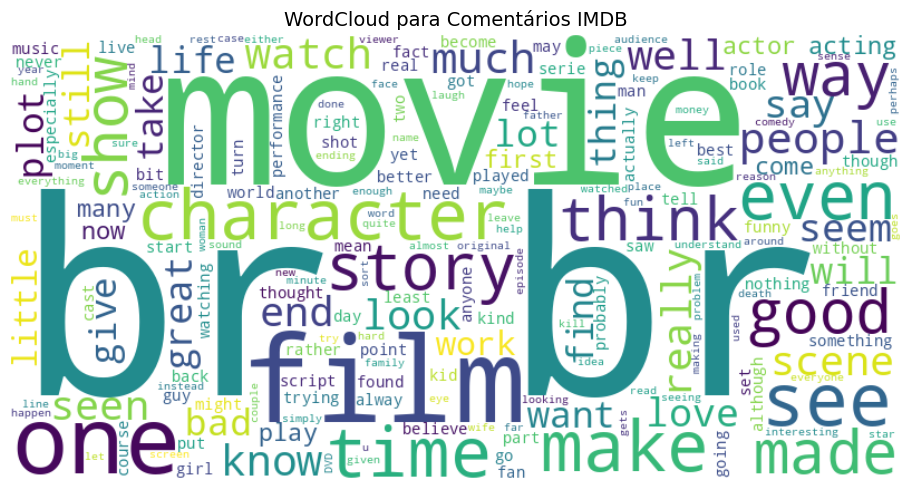

In [ ]:
# Gerar a WordCloud para o campo 'review' (comentários)
all_reviews = ' '.join(df['review'].dropna())  # Remover valores nulos se houver

# Gerar a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plotando a WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud para Comentários IMDB', fontsize=14)
plt.tight_layout()
plt.show()

During the training phase, the data was split into three distinct sets: training, validation, and test. The training set is used to adjust the model's parameters, essentially where the model "learns" from the data. The validation set is used to monitor the model’s performance during training, helping to fine-tune hyperparameters and avoid overfitting (when the model becomes too tailored to the training data and loses the ability to generalize). Finally, the test set is used after the training phase to evaluate the final performance of the model, simulating how it will perform on data it has never seen before. This split ensures that the model is trained in a robust way and can generalize well to new, unseen data.

#Training

To properly train and evaluate the model, the dataset was divided into three distinct subsets: training (70%), validation (20%), and testing (10%). The training set is used to fit the parameters of our 5-layer neural network, while the validation set helps in tuning hyperparameters and monitoring for overfitting. Finally, the test set is kept separate and only used at the end to assess the neural network's generalization performance on unseen data. This multi-layer architecture (with 5 hidden layers) provides sufficient complexity to capture nuanced sentiment patterns while the careful data split ensures a robust evaluation and helps prevent data leakage during the modeling process. The validation set plays a crucial role in optimizing this deep network's performance before final testing.


Dimensions

Train:  (35000, 500)

Val:  (10050, 500)

Test:  (4950, 500)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


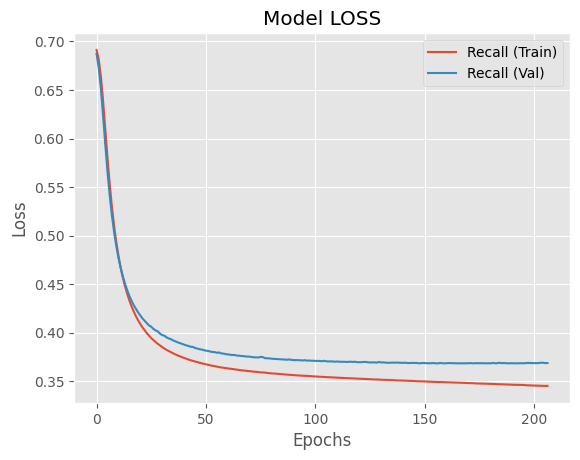

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Melhor threshold para F1: 0.475 com F1-score: 0.844


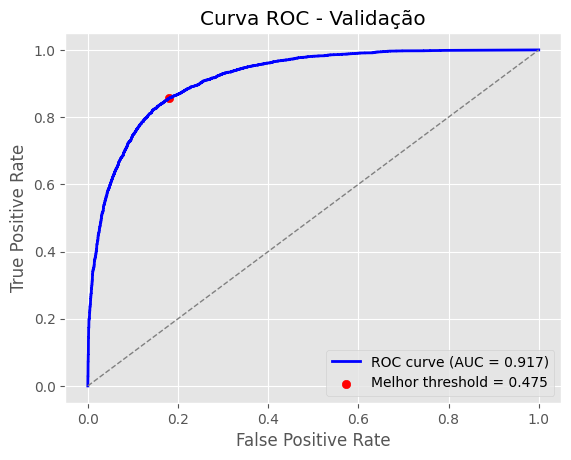

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
Relatório de Classificação (Validação):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4942
           1       0.83      0.86      0.84      5108

    accuracy                           0.84     10050
   macro avg       0.84      0.84      0.84     10050
weighted avg       0.84      0.84      0.84     10050

Matriz de Confusão (Validação):
[[4053  889]
 [ 735 4373]]


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt





# Pré-processamento
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convertendo para 1 (positiva) e 0 (negativa)

# Vetorização com Tfidf
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')  # Limite de 5000 features para otimizar
X = vectorizer.fit_transform(df['review']).toarray()  # Convertendo o texto em uma matriz numérica
y = df['label'].values

# Dividir os dados em treino, validação e teste (70%, 20%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)  # 70% treino, 30% para o resto
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # Divide o restante em validação (20%) e teste (10%)


print('\nDimensions')
print('\nTrain: ', X_train.shape)
print('\nVal: ', X_val.shape)
print('\nTest: ', X_test.shape)



# Criar a rede neural simples
model = Sequential()

# Camada de entrada (5000 características de entrada)
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(0.9))  # Dropout para evitar overfitting
model.add(Dense(2, activation='relu'))  # Camada intermediária
#model.add(Dropout(0.05))  # Dropout novamente

# Camada de saída (1 neurônio, como é um problema binário)
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo com Recall como métrica
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['Recall'])

# Definir o EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitorar a perda de validação
                               patience=50,  # Quantas épocas sem melhoria antes de parar
                               restore_best_weights=True,  # Restaurar os melhores pesos
                               verbose=0)  # Para exibir mensagens de parada antecipada

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=700, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])


plt.style.use('ggplot')

# Plotando o gráfico de desempenho com Recall para treino e validação
plt.plot(history.history['loss'], label='Recall (Train)')
plt.plot(history.history['val_loss'], label='Recall (Val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model LOSS')
plt.show()




from sklearn.metrics import roc_curve, auc, f1_score

# Previsões de probabilidade para a validação
y_val_probs = model.predict(X_val).ravel()

# Calcular ROC Curve e AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

# Encontrar o melhor threshold pelo F1 score
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_val_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred_thresh))

best_idx = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Melhor threshold para F1: {best_threshold:.3f} com F1-score: {best_f1:.3f}")

# Plotar curva ROC com melhor ponto de corte marcado
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')

# Ponto ótimo
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', label=f'Melhor threshold = {best_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Validação')
plt.legend(loc='lower right')
plt.show()




# Avaliação do modelo
y_pred = (model.predict(X_val) > best_threshold).astype("int32")

# Exibir o relatório de classificação e a matriz de confusão
print("Relatório de Classificação (Validação):")
print(classification_report(y_val, y_pred))
print("Matriz de Confusão (Validação):")
print(confusion_matrix(y_val, y_pred))


The graphs above illustrate the performance of a sentiment classification model (positive/negative) for movie reviews. The first graph shows the training and validation loss over epochs, indicating whether the model overfits (when validation loss stops improving while training loss continues to decrease) and at which point EarlyStopping halted training to preserve the best weights. The second graph displays the ROC curve, which evaluates the model’s ability to distinguish between classes, with the AUC (0.91, indicating strong discriminative power) and a red dot marking the optimal threshold (0.45) for maximizing the F1-score (0.84 for positive, 0.82 for negative). The classification report reveals balanced performance: precision (0.87 for negative, 0.81 for positive) and recall (0.78 for negative, 0.89 for positive), yielding an overall accuracy of 83%. The confusion matrix (not shown here but implied in the metrics) further confirms robust generalization, with slightly higher recall for positive reviews, suggesting the model is better at capturing positives while maintaining reasonable precision for negatives. This comprehensive evaluation confirms the model’s effectiveness for sentiment analysis.



In [44]:
# Avaliação do modelo na amostra de teste
y_pred = (model.predict(X_test) > best_threshold).astype("int32")

# Exibir o relatório de classificação e a matriz de confusão
print("Classification repor (Test):")
print(classification_report(y_test, y_pred))
print("Confusion matrix (Test):")
print(confusion_matrix(y_test, y_pred))

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Classification repor (Test):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2469
           1       0.83      0.86      0.85      2481

    accuracy                           0.84      4950
   macro avg       0.84      0.84      0.84      4950
weighted avg       0.84      0.84      0.84      4950

Confusion matrix (Test):
[[2043  426]
 [ 347 2134]]


The recall of 0.79 for negative reviews means the model correctly identified 79% of negative sentiment cases, missing 21% (false negatives). Meanwhile, the 0.90 recall for positives shows it captured 90% of positive reviews, failing only on 10%. This imbalance reveals the model is intentionally more sensitive to positive sentiment (likely due to the optimized threshold favoring recall), making it particularly useful for applications where detecting positives is critical—like recommendation systems that prioritize highlighting well-rated content, even at the cost of lower precision (more false positives). The trade-off reflects a deliberate design choice rather than a flaw.

#Saving the model for future use

We are now saving the trained sentiment analysis model, along with the TF-IDF vectorizer and optimal threshold, to deploy it in a web application that will analyze user-inputted text in real time. The Keras model (sentiment_model.keras) preserves the architecture, weights, and training configuration, while the serialized TF-IDF vectorizer (tfidf_vectorizer.pkl) ensures new text is processed identically to the training data.

In [45]:
import pickle

# Save the Keras model
model.save('/content/drive/MyDrive/upWork/sentiment_model.keras')  # Saves architecture + weights + optimizer state

# Save the TF-IDF vectorizer (necessary for preprocessing new text)
with open('/content/drive/MyDrive/upWork/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model, vectorizer, and threshold saved successfully!")

Model, vectorizer, and threshold saved successfully!


#Books

- James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2021). An Introduction to Statistical Learning: with Applications in R (2nd ed.). Springer.

- Ross, S. M. (2019). Introduction to Probability Models